In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from llama import Llama32
import torch
to_load = True

/opt/conda/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
torch.cuda.empty_cache()

In [3]:
img_name = "000000147415.jpg"
img_path = f"/home/ubuntu/data/coco/val2017/{img_name}"

In [4]:
img_path

'/home/ubuntu/data/coco/val2017/000000147415.jpg'

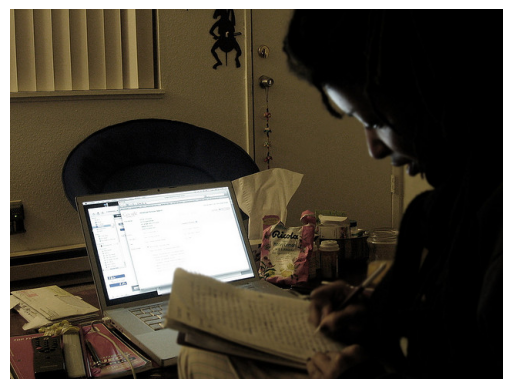

In [4]:
img = Image.open(f"/home/ubuntu/data/coco/val2017/{img_name}")
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
prompt = "Question: What activity does the cat appear most likely to do?\nChoices: 1. drink 2. jump 3. eat 4. sleep \n Remember cat is an animal that like to move around. Let's do it step by step."
# choices = 

In [50]:
prompt = """You are an agent capable of answering multi choice questions.
Question: What item on the desk could help with a cold?
Choices: 1. cough drops 2. syringe 3. pills 4. herbal tea.
Before answering the question, please generate one clarifying question to help answer the question.
Please only output the questions. 
For example:
Question: \{string of question\}

Question:
"""


In [56]:
prompt = """
You are an agent capable of answering multi choice questions.
Question: What item on the desk could help with a cold?
Choices: 1. cough drops 2. syringe 3. pills 4. herbal tea.
This is the scenario we have. 
Please answer the following clarifying question. 
Question: What is the item on the desk that is likely to be used to treat a cold?
Answer:\{string of the answer\}
"""

In [61]:
prompt = """Please answer the following question accordingly
Are there any items on the desk specifically labeled for cold or cough relief?
Can we see any packages or branding that indicate medicinal use, such as "cough drops" or "herbal tea"?
Is there any evidence of tea bags or a cup that might suggest herbal tea is present?
Are there any identifiable labels on containers that could indicate a medical or therapeutic product?
Is there any visible item that resembles a lozenge or typical cold relief remedy?
Are there any instructions or labels on the packages that imply use for cold symptoms?
"""

In [62]:

if to_load:
    model = Llama32()
    to_load = False

# model = Llama32()

In [63]:
output = model.predict_one(img_path, prompt,max_new_tokens = 300)

In [64]:
print(output)

<|begin_of_text|><|start_header_id|>user<|end_header_id|>

<|image|>Please answer the following question accordingly
Are there any items on the desk specifically labeled for cold or cough relief?
Can we see any packages or branding that indicate medicinal use, such as "cough drops" or "herbal tea"?
Is there any evidence of tea bags or a cup that might suggest herbal tea is present?
Are there any identifiable labels on containers that could indicate a medical or therapeutic product?
Is there any visible item that resembles a lozenge or typical cold relief remedy?
Are there any instructions or labels on the packages that imply use for cold symptoms?
<|eot_id|><|start_header_id|>assistant<|end_header_id|>

Yes, there is a visible package on the desk with the label "Garden of Life" which is a brand that offers herbal tea and other health-related products. The presence of this package suggests that the person may be using it for cold or cough relief. 

Additionally, there is a cup on the de

In [60]:
print(output)

<|begin_of_text|><|start_header_id|>user<|end_header_id|>

<|image|>
You are an agent capable of answering multi choice questions.
Question: What item on the desk could help with a cold?
Choices: 1. cough drops 2. syringe 3. pills 4. herbal tea.
This is the scenario we have. 
Please answer the following clarifying question. 
Question: What is the item on the desk that is likely to be used to treat a cold?
Answer:\{string of the answer\}
<|eot_id|><|start_header_id|>assistant<|end_header_id|>

The item on the desk that is likely to be used to treat a cold is the herbal tea.<|eot_id|>


In [44]:
print(output)

<|begin_of_text|><|start_header_id|>user<|end_header_id|>

<|image|>Please answer the following question accordingly
1. Is there a container with a lid on the desk?
2. Is the container with a lid labeled as "hot" or "cold"?
3. Is there a bag of loose-leaf tea on the desk?
4. Is the bag of loose-leaf tea labeled as "herbal"?
5. Is there a small box or package on the desk that resembles cough drops?
6. Is the small box or package labeled as "cough drops"?
7. Is there a small vial or bottle on the desk that resembles a syringe?
8. Is the small vial or bottle labeled as a medication?
<|eot_id|><|start_header_id|>assistant<|end_header_id|>

To answer these questions, let's analyze the image carefully:

1. **Is there a container with a lid on the desk?**
   Yes, there is a container with a lid on the desk.

2. **Is the container with a lid labeled as "hot" or "cold"?**
   The container is not labeled as "hot" or "cold." It has a label that reads "Gloria's," which doesn't provide information 

In [9]:
from paddleocr import PaddleOCR, draw_ocr
import matplotlib.pyplot as plt
from PIL import Image

# Load PaddleOCR model
ocr = PaddleOCR(use_angle_cls=True, lang='en')

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /home/ubuntu/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 3910/3910 [00:10<00:00, 370.09it/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /home/ubuntu/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10000/10000 [00:20<00:00, 489.86it/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /home/ubuntu/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2138/2138 [00:10<00:00, 195.25it/s]

[2024/10/31 17:00:47] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/ubuntu/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/ubuntu/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_le

In [50]:

# Run OCR on the image
result = ocr.ocr("/home/ubuntu/project/002877-R1-008-2A.jpg", cls=True)
image = Image.open("/home/ubuntu/project/002877-R1-008-2A.jpg")

# Display detected text and bounding boxes
for line in result[0]:
    text = line[1][0]  # Extract detected text
    confidence = line[1][1]  # Extract confidence score
    print(f"Detected text: {text}, Confidence: {confidence}")

# Visualize results by drawing bounding boxes and text on the image
boxes = [line[0] for line in result[0]]
texts = [line[1][0] for line in result[0]]
# image_with_boxes = draw_ocr(image, boxes, texts)

# # Convert and display the image with bounding boxes
# plt.imshow(image_with_boxes)
# plt.axis('off')
# plt.show()

[2024/10/31 17:10:43] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.06359624862670898
[2024/10/31 17:10:43] ppocr DEBUG: cls num  : 3, elapsed : 0.0058438777923583984
[2024/10/31 17:10:43] ppocr DEBUG: rec_res num  : 3, elapsed : 0.028943300247192383
Detected text: STARBUCKS, Confidence: 0.9974716901779175
Detected text: COFFEE, Confidence: 0.9977273941040039
Detected text: Bank, Confidence: 0.9844586253166199


In [48]:
result

[None]

In [4]:
from easyocr import Reader

reader = Reader(['en'])  # Initializes reader with English
result = reader.readtext("/home/ubuntu/project/WechatIMG105.jpg")  # Replace with the path to your image
print(result)

[]
